In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import scipy as sc
import copy
import matplotlib.gridspec as gridspec
from matplotlib import cm

In [12]:
maxN = 2
Vinitial = 1

coords = np.mgrid[0:101, 0:51]
ygrid = coords[0,:,:]
xgrid = coords[1,:,:]

In [13]:
def V(x, y, maxN, L):
    sum = 0
    for n in range (1, maxN+1):
        if(n % 2 == 1):
            an = 4 * Vinitial / (n * np.pi)
            sum = sum + an * np.sin(n*np.pi*x / L) * np.exp(-n * np.pi * y / L)
    return sum

In [14]:
def Vexact(x, y, L):
    coeff = 2 * Vinitial / np.pi
    num = np.sin(np.pi * x / L)
    denom = np.sinh(np.pi * y / L)
    return (coeff * np.arctan(num/denom))

In [15]:
def fracerror(x,y,maxN,L):
    est = V(x, y, maxN, L)
    exact = Vexact(x,y,L)
    return (abs(est-exact)/exact)

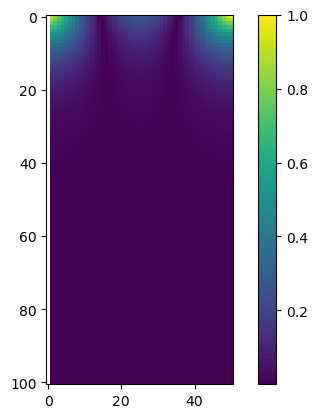

In [16]:
np.seterr(divide = 'ignore') 
np.seterr(invalid='ignore')
pl.imshow(fracerror(xgrid,ygrid,maxN, 50))
pl.colorbar()
pl.show()

The largest fractional errors occur at y = 0, x = 0, L. There is also some error due to the sinusoidal function near x = L/2 that disappears when the sum is allowed to iterate to larger values of maxN. This is because the numerical method struggles to handle the boundary conditions at x = 0, L, relying on the sinusiodal function to approximate what the analytical function handles exactly.